<a href="https://colab.research.google.com/github/viabrinsa/PCVK_VirginiaAbrinsa/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Accessing My Googlee Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukan Nilai kecerahan50


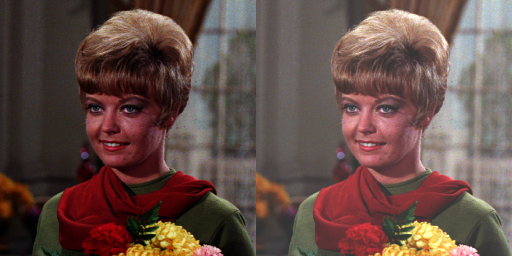

In [8]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukan Nilai kecerahan'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


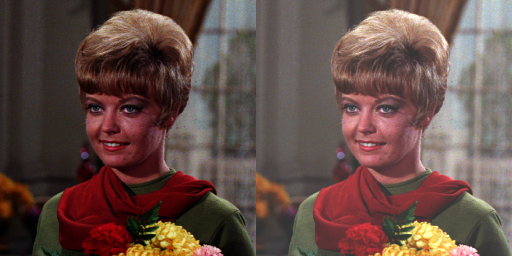

In [11]:
#no 1
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 40
Masukkan nilai kontras [1.0 - 3.0]: 30


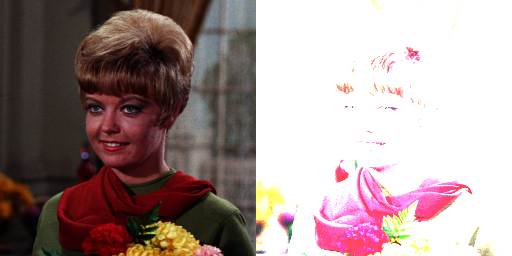

In [12]:
#no 2
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)
final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------
Masukkan nilai kecerahan: 30


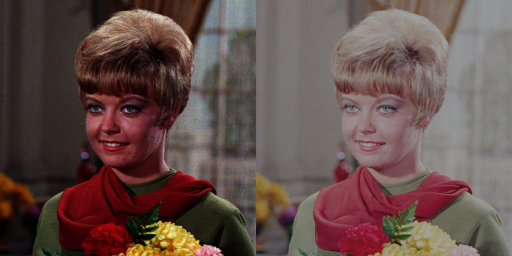

In [32]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log([1 + original[y,x,c]])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

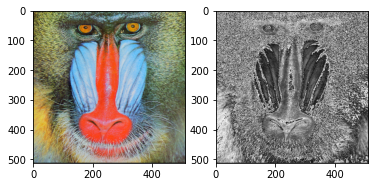

In [34]:
#no3 averaging
color_img = cv.cvtColor(cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff'), cv.COLOR_BGR2RGB)
R, G, B, = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
gray_img = (R+G+B)/3

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img,cmap='gray')

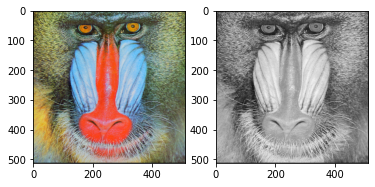

In [35]:
# no 3
# lightness
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
max_channels = np.maximum(np.maximum(R, G), B)
min_channels = np.minimum(np.minimum(R, G), B)

gray_img = max_channels/2 + min_channels/2

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img,cmap='gray')

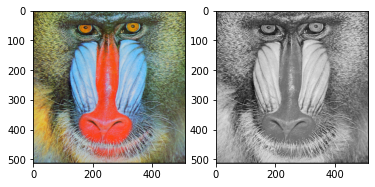

In [36]:
#no 3 luminance
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]

gray_img = (0.2126 * R) + (0.7152 * G) + (0.0722 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img,cmap='gray')

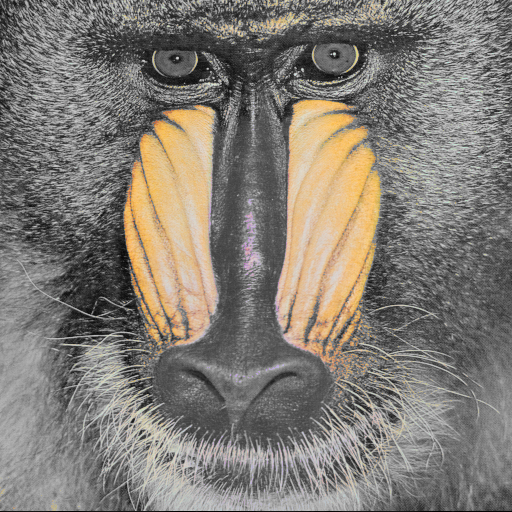

In [38]:
# no 4 warna tertentu selanjutnya warna lain grayscale
ret, mask = cv.threshold(color_img[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(color_img)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(color_img, mask3)
gray = cv.cvtColor(color_img, cv.COLOR_BGR2GRAY)
color_img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(color_img, 255 - mask3)

hasil = gray + red
cv2_imshow(hasil)